In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


<ipython-input-4-e3b869d0dc2e>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv("/content/Nifty_Auto_Data.csv", parse_dates=True, index_col=0)
<ipython-input-4-e3b869d0dc2e>:11: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/ba

Predicted Prices:
           Date  Predicted Price
3064 2024-03-01     20269.983857
3065 2024-04-01     20257.166512
3066 2024-05-01     20238.268016
3067 2024-06-01     20238.834091
3068 2024-07-01     20255.777689
3069 2024-08-01     20291.489147

Evaluation Metrics:
Mean Absolute Error (MAE): 326.11569857596805
Root Mean Squared Error (RMSE): 429.0379653339799


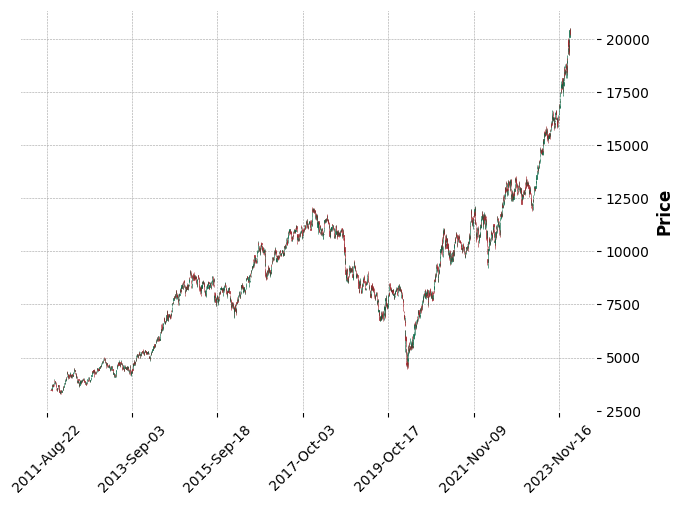

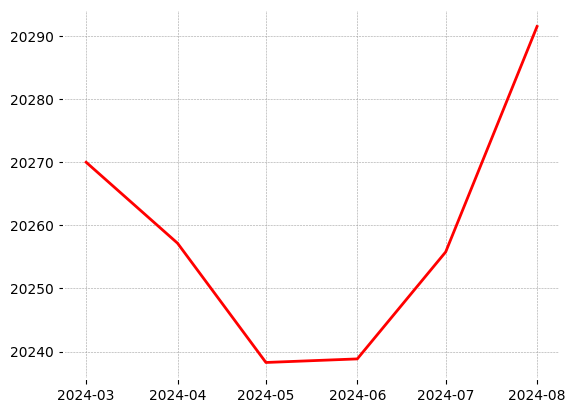

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


data = pd.read_csv("/content/Nifty_Auto_Data.csv", parse_dates=True, index_col=0)
ohlc_data = data[['Open', 'High', 'Low', 'Close']]
hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
                                seasonal_periods=12, trend='add', damped=True).fit()
forecast = hw_model.forecast(steps=6)
next_six_months = pd.date_range(start="2024-03-01", periods=6, freq='MS')
predictions_df = pd.DataFrame({'Date': next_six_months, 'Predicted Price': forecast})
test_data = data['Close'].iloc[-6:]
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)


print("Predicted Prices:")
print(predictions_df)
print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
combined_prices = pd.concat([ohlc_data, predictions_df.set_index('Date')['Predicted Price']],
                            axis=0)
mpf.plot(ohlc_data, type='candle', style='charles', ylabel='Price', ylabel_lower='Volume',
         volume=False)
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], color='red',
         label='Predicted Price')
plt.show()


<ipython-input-5-4217a50c9ab3>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv("/content/Nifty_Energy_Data.csv", parse_dates=True, index_col=0)
<ipython-input-5-4217a50c9ab3>:11: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is avai

Predicted Prices:
           Date  Predicted Price
3064 2024-03-01     39430.819599
3065 2024-04-01     39467.020730
3066 2024-05-01     39612.361799
3067 2024-06-01     39742.003512
3068 2024-07-01     39772.468316
3069 2024-08-01     39901.488854

Evaluation Metrics:
Mean Absolute Error (MAE): 406.7419665286252
Root Mean Squared Error (RMSE): 524.0851158003998


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


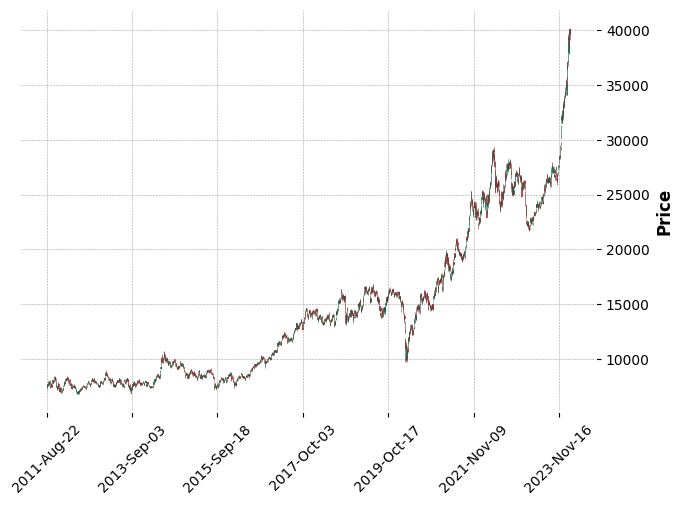

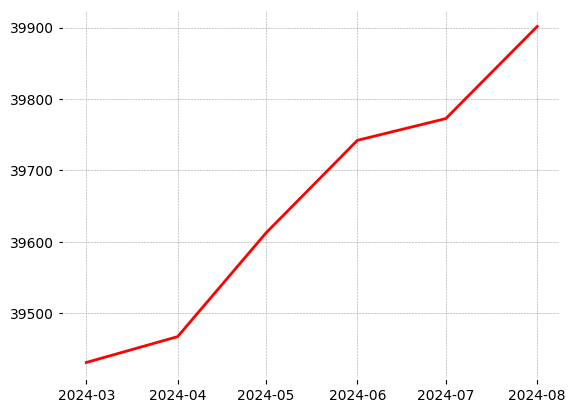

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


data = pd.read_csv("/content/Nifty_Energy_Data.csv", parse_dates=True, index_col=0)
ohlc_data = data[['Open', 'High', 'Low', 'Close']]
hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
                                seasonal_periods=12, trend='add', damped=True).fit()
forecast = hw_model.forecast(steps=6)
next_six_months = pd.date_range(start="2024-03-01", periods=6, freq='MS')
predictions_df = pd.DataFrame({'Date': next_six_months, 'Predicted Price': forecast})
test_data = data['Close'].iloc[-6:]
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)


print("Predicted Prices:")
print(predictions_df)
print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
combined_prices = pd.concat([ohlc_data, predictions_df.set_index('Date')['Predicted Price']],
                            axis=0)
mpf.plot(ohlc_data, type='candle', style='charles', ylabel='Price', ylabel_lower='Volume',
         volume=False)
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], color='red',
         label='Predicted Price')
plt.show()


<ipython-input-6-fb7e28c9cb2f>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv("/content/Nifty_FMCG_Data.csv", parse_dates=True, index_col=0)
<ipython-input-6-fb7e28c9cb2f>:11: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is availa

Predicted Prices:
           Date  Predicted Price
3063 2024-03-01     53936.613747
3064 2024-04-01     53901.584170
3065 2024-05-01     53863.193682
3066 2024-06-01     53834.878951
3067 2024-07-01     53850.674158
3068 2024-08-01     53890.108118

Evaluation Metrics:
Mean Absolute Error (MAE): 243.2141922962122
Root Mean Squared Error (RMSE): 329.9334283874377


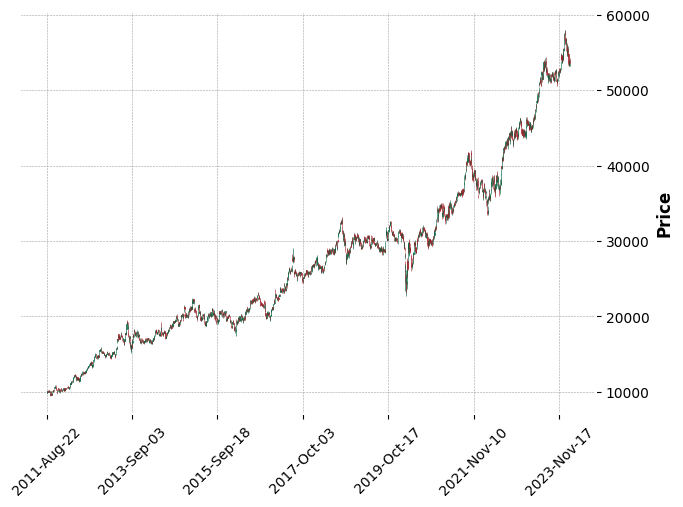

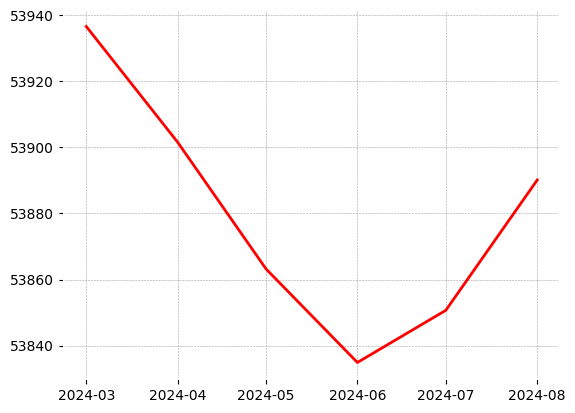

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


data = pd.read_csv("/content/Nifty_FMCG_Data.csv", parse_dates=True, index_col=0)
ohlc_data = data[['Open', 'High', 'Low', 'Close']]
hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
                                seasonal_periods=12, trend='add', damped=True).fit()
forecast = hw_model.forecast(steps=6)
next_six_months = pd.date_range(start="2024-03-01", periods=6, freq='MS')
predictions_df = pd.DataFrame({'Date': next_six_months, 'Predicted Price': forecast})
test_data = data['Close'].iloc[-6:]
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)


print("Predicted Prices:")
print(predictions_df)
print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
combined_prices = pd.concat([ohlc_data, predictions_df.set_index('Date')['Predicted Price']],
                            axis=0)
mpf.plot(ohlc_data, type='candle', style='charles', ylabel='Price', ylabel_lower='Volume',
         volume=False)
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], color='red',
         label='Predicted Price')
plt.show()


<ipython-input-7-aac98bd874a9>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv("/content/Nifty_Infra_Data.csv", parse_dates=True, index_col=0)
<ipython-input-7-aac98bd874a9>:11: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/b

Predicted Prices:
           Date  Predicted Price
3064 2024-03-01      8086.041739
3065 2024-04-01      8091.498297
3066 2024-05-01      8105.797076
3067 2024-06-01      8118.242548
3068 2024-07-01      8119.634467
3069 2024-08-01      8139.318753

Evaluation Metrics:
Mean Absolute Error (MAE): 76.14400712265387
Root Mean Squared Error (RMSE): 90.1086364946558


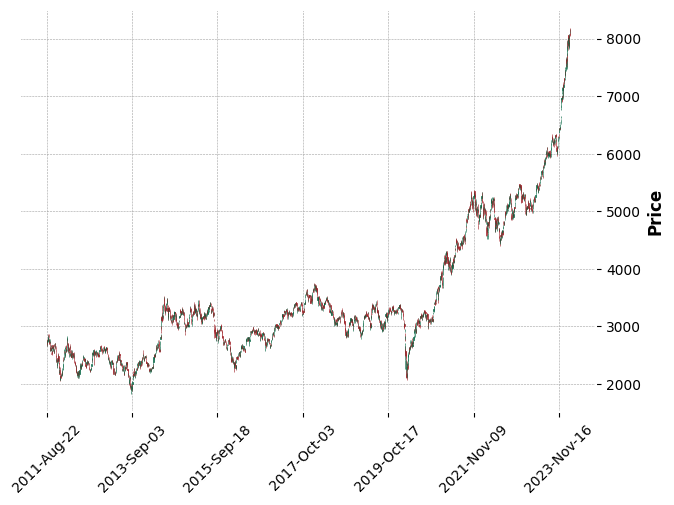

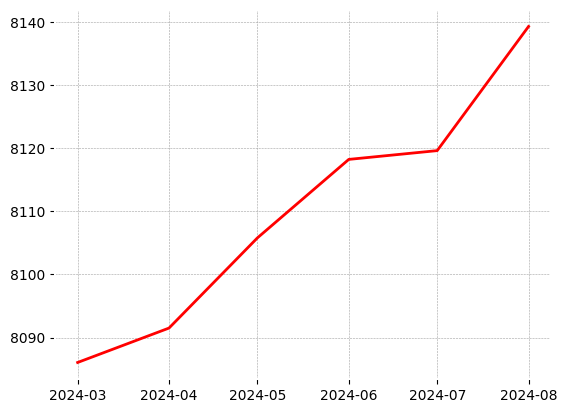

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


data = pd.read_csv("/content/Nifty_Infra_Data.csv", parse_dates=True, index_col=0)
ohlc_data = data[['Open', 'High', 'Low', 'Close']]
hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
                                seasonal_periods=12, trend='add', damped=True).fit()
forecast = hw_model.forecast(steps=6)
next_six_months = pd.date_range(start="2024-03-01", periods=6, freq='MS')
predictions_df = pd.DataFrame({'Date': next_six_months, 'Predicted Price': forecast})
test_data = data['Close'].iloc[-6:]
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)


print("Predicted Prices:")
print(predictions_df)
print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
combined_prices = pd.concat([ohlc_data, predictions_df.set_index('Date')['Predicted Price']],
                            axis=0)
mpf.plot(ohlc_data, type='candle', style='charles', ylabel='Price', ylabel_lower='Volume',
         volume=False)
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], color='red',
         label='Predicted Price')
plt.show()


<ipython-input-8-e437960e8b97>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv("/content/Nifty_IT_Data.csv", parse_dates=True, index_col=0)
<ipython-input-8-e437960e8b97>:11: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is availabl

Predicted Prices:
           Date  Predicted Price
2774 2024-03-01     37367.735043
2775 2024-04-01     37335.615656
2776 2024-05-01     37328.348190
2777 2024-06-01     37351.962797
2778 2024-07-01     37393.631035
2779 2024-08-01     37387.522441

Evaluation Metrics:
Mean Absolute Error (MAE): 621.1304163156965
Root Mean Squared Error (RMSE): 708.7552792872067


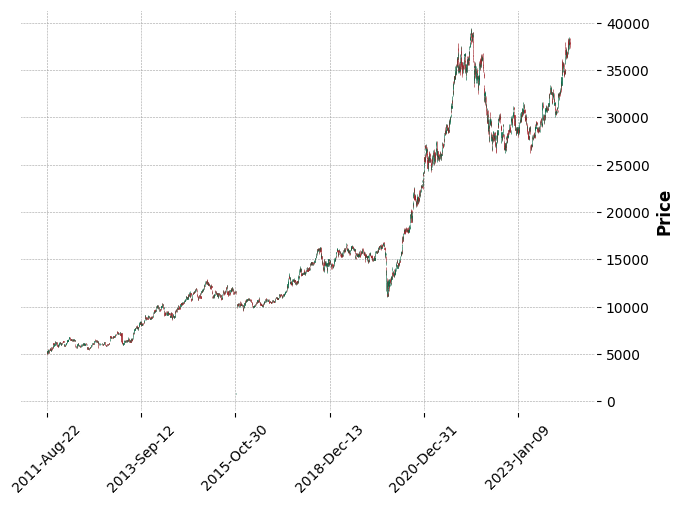

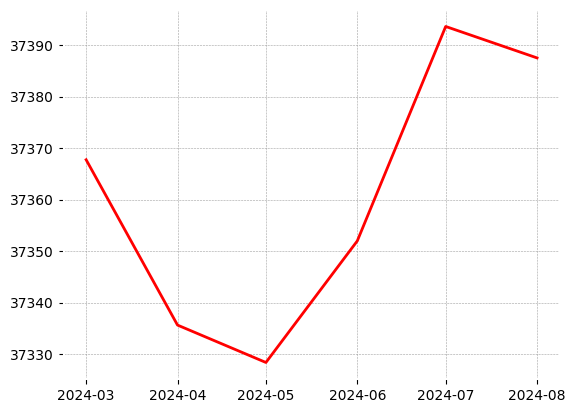

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


data = pd.read_csv("/content/Nifty_IT_Data.csv", parse_dates=True, index_col=0)
ohlc_data = data[['Open', 'High', 'Low', 'Close']]
hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
                                seasonal_periods=12, trend='add', damped=True).fit()
forecast = hw_model.forecast(steps=6)
next_six_months = pd.date_range(start="2024-03-01", periods=6, freq='MS')
predictions_df = pd.DataFrame({'Date': next_six_months, 'Predicted Price': forecast})
test_data = data['Close'].iloc[-6:]
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)


print("Predicted Prices:")
print(predictions_df)
print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
combined_prices = pd.concat([ohlc_data, predictions_df.set_index('Date')['Predicted Price']],
                            axis=0)
mpf.plot(ohlc_data, type='candle', style='charles', ylabel='Price', ylabel_lower='Volume',
         volume=False)
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], color='red',
         label='Predicted Price')
plt.show()


<ipython-input-9-6cbc454a1341>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv("/content/Nifty_Realty_Data.csv", parse_dates=True, index_col=0)
<ipython-input-9-6cbc454a1341>:11: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/

Predicted Prices:
           Date  Predicted Price
3064 2024-03-01       905.335268
3065 2024-04-01       906.022925
3066 2024-05-01       907.654986
3067 2024-06-01       908.770212
3068 2024-07-01       909.573130
3069 2024-08-01       912.695757

Evaluation Metrics:
Mean Absolute Error (MAE): 32.46703586105485
Root Mean Squared Error (RMSE): 35.96461985862397


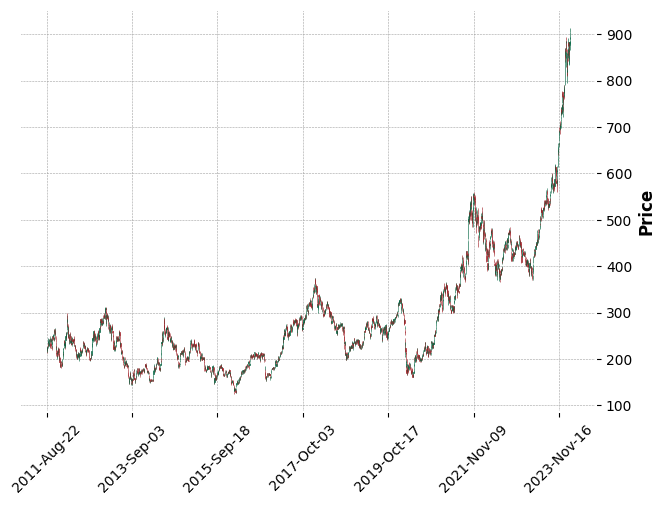

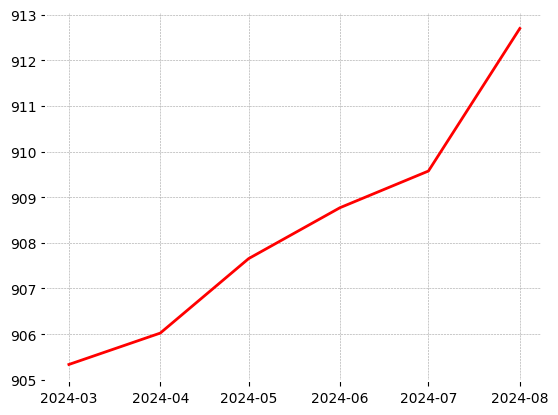

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


data = pd.read_csv("/content/Nifty_Realty_Data.csv", parse_dates=True, index_col=0)
ohlc_data = data[['Open', 'High', 'Low', 'Close']]
hw_model = ExponentialSmoothing(data['Close'], seasonal='add',
                                seasonal_periods=12, trend='add', damped=True).fit()
forecast = hw_model.forecast(steps=6)
next_six_months = pd.date_range(start="2024-03-01", periods=6, freq='MS')
predictions_df = pd.DataFrame({'Date': next_six_months, 'Predicted Price': forecast})
test_data = data['Close'].iloc[-6:]
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)


print("Predicted Prices:")
print(predictions_df)
print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
combined_prices = pd.concat([ohlc_data, predictions_df.set_index('Date')['Predicted Price']],
                            axis=0)
mpf.plot(ohlc_data, type='candle', style='charles', ylabel='Price', ylabel_lower='Volume',
         volume=False)
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], color='red',
         label='Predicted Price')
plt.show()
